In [1]:
import matplotlib.pyplot as plt
from maze import Maze , plot_action_values, plot_policy
import numpy as np

In [2]:
env = Maze()

In [3]:
action_values = np.zeros((5, 5, 4))

In [4]:
def policy(state, epsilon = 0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

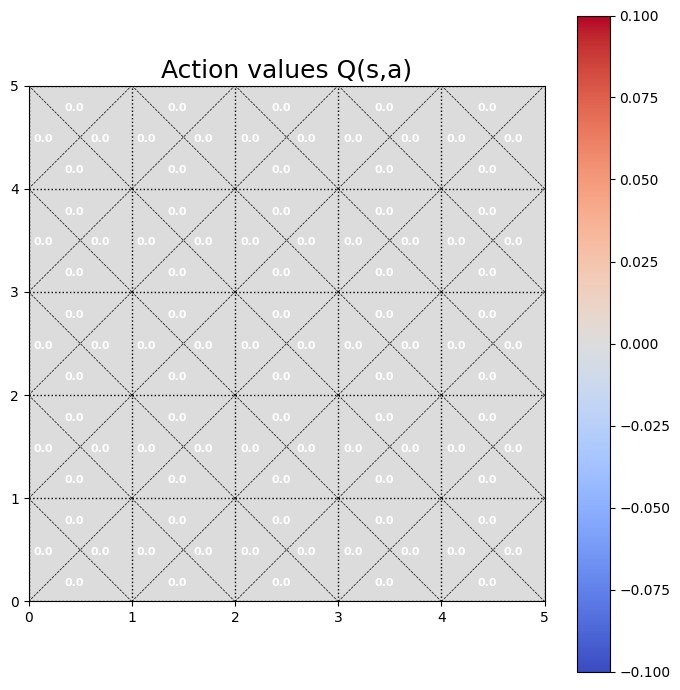

In [5]:
plot_action_values(action_values)

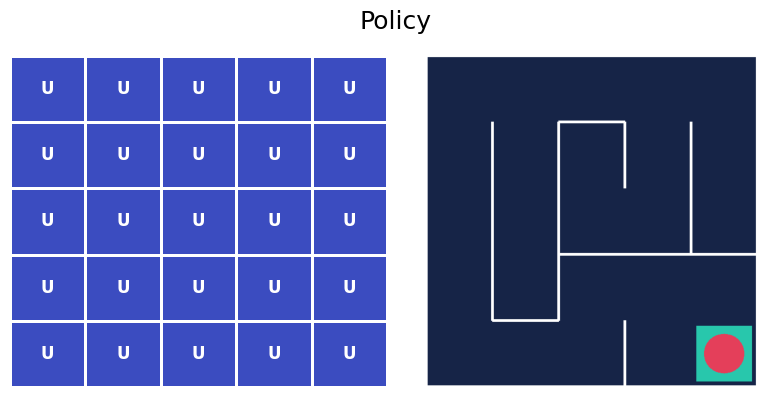

In [6]:
plot_policy(action_values, env.render(mode = 'rgb_array'))

In [24]:
def sarsa(action_values, policy, episodes, alpha = 0.1, gamma = 0.99, epsilon = 0.2):
    for episode in range(1, episodes+1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ =  env.step(action)
            next_action = policy(next_state, epsilon)

            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma*next_qsa - qsa)
            state = next_state
            action = next_action

In [25]:
sarsa(action_values, policy, 1000)

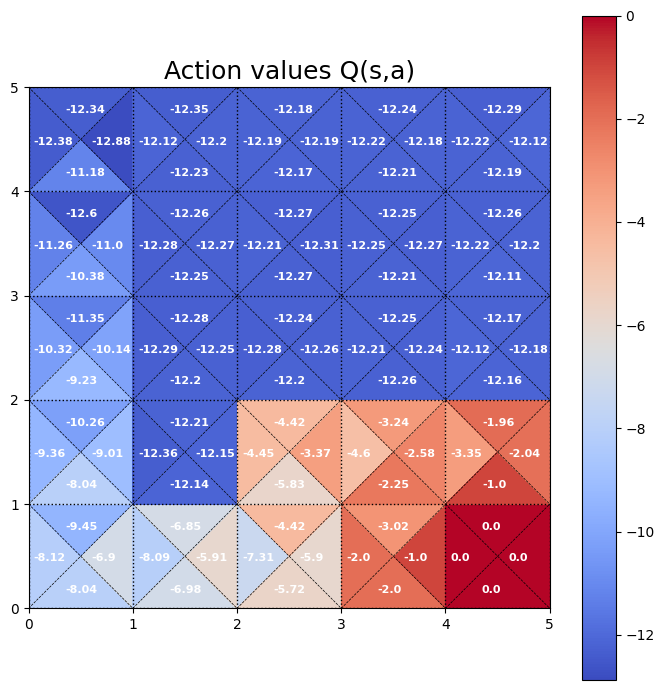

In [26]:
plot_action_values(action_values)

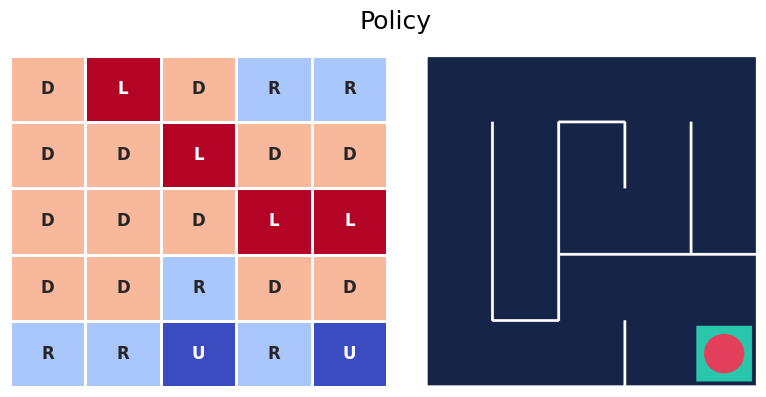

In [27]:
plot_policy(action_values, env.render(mode = 'rgb_array'))

In [28]:
test_agent(env, policy)

C:\Users\hebli\AppData\Local\Temp\ipykernel_520\547560918.py:215: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use(orig_backend)
